# Hyperparameter
## General Parameters
디폴트를 바꾸는 일이 거의 없다.

##### - booster[default : gbtree]
- gbtree  : tree based model / gblinear : linear model

##### - silent[default : 0]
- : 출력 메시지를 나타내고 싶지 않음

##### - nthread[default : 전체]


## Booster Parameters
트리 최적화, boosting, regularization 등
##### - eta[default 파이썬 wrapper : 0.3 / sklearn wrapper : 0.1]
- learning rate

##### - num_boost
- n_estimators 와 같은 파라미터
- weak learner의 개수

##### - min_child_weight[default : 1]
- GBM의 min_child_leaf와 유사. 과적합을 조절

##### - gamma [default : 0]
- 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값
- 감마보다 큰 손실이 감소된 경우에 리프 노드를 분리.
- 값이 클수록 과적합 감소 효과

##### - max_depth[default : 6]
- 트리의 깊이에 제한.
- 너무 커지면, 특정 피처 조건에 특화
- 보통 3~10

##### - sub_sample[default : 1]
- GBM의 subsample과 동일
- 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율.

##### - colsample_bytree[default : -1]
- 트리 생성에 필요한 피처를 임의로 샘플링하는 데 사용

##### - lambda[default : 1] (reg_lambda)
- L2 Regularization
- 피처 개수가 많을 경우 적용을 검토하며, 값이 클수록 과적합 감소 효과

##### - alpha[default : 0] (reg_alpha)
- L1 Regularization
- 피처 개수가 많을 경우 적용을 검토하며, 값이 클수록 과적합 감소 효과

##### - scale_pos_weight [default : 1]
- 비대칭한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한파라미터

## Learning Task Parameters
학습 시의 객체 함수, 평가지표 등

##### - objective
최솟값을 가져야할 손실 함수를 정의

- binary:logistic : 이진 분류
- multi:softmax : 다중 분류.-> num_class(레이블 클래스) 지정해야 함
- multi:softprob : 다중분류. 개별 레이블 클래스의 예측확률 분환
##### - eval_metric
검증에 사용되는 함수 정의.
회귀 -> rmse / 분류 -> error

- rmse, mae, logloss, error, merror,mlogloss, auc

## overfitting 해결
- eta를 낮춤
- max_depth를 낮춤
- min_child_weight값을 높임
- gamma를 높임
- subsample, colsample_bytree 조정

## early stopping
- 예측 오류가 더이상 개선되지 않으면 반복을 끝까지 수행하지 않고, 중지해 수행 시간을 개선
- n_estimators = 200, early stopping = 50이면,
- 다음 50번을 반복하는동안, 개선이 없으면 stop

# cancer ex
classification malignant(0) or benign(1)

## using xgboost wrapper

In [1]:
import xgboost as xgb
print(xgb.__version__)

0.82


In [2]:
from xgboost import plot_importance #visualize features importnace
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

In [3]:
cancer = pd.DataFrame(data = X_features, columns = dataset.feature_names)
cancer['target'] = y_label
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
#malignant : 0 / benign : 1
print(dataset.target_names)
print(cancer.target.value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


### train

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)
print('X_train shape : ',X_train.shape, 'X_test shape : ',X_test.shape)

X_train shape :  (455, 30) X_test shape :  (114, 30)


In [6]:
dtrain = xgb.DMatrix(data = X_train, label = y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)
print(type(dtrain))

<class 'xgboost.core.DMatrix'>


In [7]:
params = {
    'max_depth' : 3,
    'eta' : 0.1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'logloss' #early_stopping을 하려면, 반드시 있어야 함
}

num_rounds = 3000 # the number of boosting repetition

In [8]:
wlist = [(dtrain ,'train'), (dtest, 'eval')]

xgb_model = xgb.train(params=params, dtrain = dtrain, num_boost_round=num_rounds, evals = wlist, verbose_eval=20,
                     early_stopping_rounds=100)
#evals : early_stopping을 하려면, 반드시 있어야 함

[0]	train-logloss:0.609688	eval-logloss:0.61352
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[20]	train-logloss:0.109688	eval-logloss:0.158202
[40]	train-logloss:0.040649	eval-logloss:0.095869
[60]	train-logloss:0.021316	eval-logloss:0.091939
[80]	train-logloss:0.014185	eval-logloss:0.087577
[100]	train-logloss:0.011002	eval-logloss:0.086498
[120]	train-logloss:0.009118	eval-logloss:0.087626
[140]	train-logloss:0.007946	eval-logloss:0.08911
[160]	train-logloss:0.007282	eval-logloss:0.08828
[180]	train-logloss:0.006901	eval-logloss:0.087038
[200]	train-logloss:0.006572	eval-logloss:0.085888
[220]	train-logloss:0.006293	eval-logloss:0.085791
[240]	train-logloss:0.006057	eval-logloss:0.08618
[260]	train-logloss:0.005855	eval-logloss:0.086461
[280]	train-logloss:0.005679	eval-logloss:0.086679
[300]	train-logloss:0.005526	eval-logloss:0.086179
Stopping. Best iteration:
[211]	train-loglos

In [9]:
print('best iteration : ', xgb_model.best_iteration)
print('best score : ', xgb_model.best_score)

best iteration :  211
best score :  0.085593


### predict
- default : predict  probability

In [10]:
pred_prob = xgb_model.predict(dtest)
print(np.round(pred_prob[:10], 3))

# prob > 1 : 1 or prob <= 1: 0
pred = [1 if x > 0.5 else 0 for x in pred_prob]
print(pred[:10])

[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.metrics import confusion_matrix

print('accuracy : {0:.4f} precision : {1:.4f} recall : {2:.4f}'.format(accuracy_score(y_test, pred), 
                                                                       precision_score(y_test, pred),
                                                                       recall_score(y_test, pred)
                                                                      ))

print(confusion_matrix(y_test, pred))

accuracy : 0.9737 precision : 0.9744 recall : 0.9870
[[35  2]
 [ 1 76]]


### feature importance plot

In [12]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_model, ax = ax)

### cv

In [13]:
params

{'eta': 0.1,
 'eval_metric': 'logloss',
 'max_depth': 3,
 'objective': 'binary:logistic'}

In [14]:
xgb.cv(params, dtrain, num_boost_round=10, nfold = 3, stratified=False, folds = None)
#num_boost_round : the number of iteration
#nfold : the number of cv sample

,test-logloss-mean,test-logloss-std,train-logloss-mean,train-logloss-std
0,0.617448,0.004961,0.610037,0.000064
1,0.555140,0.008989,0.541817,0.000203
2,0.503529,0.012238,0.483717,0.000955
3,0.459869,0.015795,0.434676,0.001311
4,0.423058,0.016788,0.392310,0.001686
5,0.391187,0.019785,0.355129,0.001390
6,0.361119,0.019378,0.322530,0.001909
7,0.337139,0.021085,0.294159,0.001618
8,0.314902,0.019971,0.269083,0.002068
9,0.295012,0.019237,0.246208,0.001940


In [15]:
xgb_model.best_score

0.085593

## sklearn wrapper
- eta -> learning_rate
- sub_sample -> subsample
- lambda -> reg_lambda
- alpha -> reg_alpha

In [16]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train ,y_train)
w_pred = xgb_wrapper.predict(X_test)

In [17]:
print('accuracy : {0:.4f} precision : {1:.4f} recall : {2:.4f}'.format(accuracy_score(y_test, pred), 
                                                                       precision_score(y_test, pred),
                                                                       recall_score(y_test, pred)
                                                                      ))

print(confusion_matrix(y_test, pred))

accuracy : 0.9737 precision : 0.9744 recall : 0.9870
[[35  2]
 [ 1 76]]


### early stopping
- eval_metric, eval_set 필수

In [28]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)] #원래는 y_test를 모르기 때문에 사용할 수 없음

xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

wrapper_pred = xgb_wrapper.predict(X_test)

#400번 수행하지 않고, 311번 반복 후 학습 완료.
#211번 반복 시 logloss가 0.085593이고 311번 때 0.085498인데
#211번에서 311번까지 early_stopping_rounds = 100번만큼 반복하는 동안 성능 평가 지수가 향상되지 않음

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494248
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

[230]	validation_0-logloss:0.086002
[231]	validation_0-logloss:0.085922
[232]	validation_0-logloss:0.086102
[233]	validation_0-logloss:0.086115
[234]	validation_0-logloss:0.086169
[235]	validation_0-logloss:0.086263
[236]	validation_0-logloss:0.086291
[237]	validation_0-logloss:0.086217
[238]	validation_0-logloss:0.086395
[239]	validation_0-logloss:0.086342
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.086195
[242]	validation_0-logloss:0.086248
[243]	validation_0-logloss:0.086263
[244]	validation_0-logloss:0.086293
[245]	validation_0-logloss:0.086222
[246]	validation_0-logloss:0.086398
[247]	validation_0-logloss:0.086347
[248]	validation_0-logloss:0.086276
[249]	validation_0-logloss:0.086448
[250]	validation_0-logloss:0.086294
[251]	validation_0-logloss:0.086312
[252]	validation_0-logloss:0.086364
[253]	validation_0-logloss:0.086394
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.086441
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08

In [29]:
print('accuracy : {0:.4f} precision : {1:.4f} recall : {2:.4f}'.format(accuracy_score(y_test, wrapper_pred), 
                                                                       precision_score(y_test, wrapper_pred),
                                                                       recall_score(y_test, wrapper_pred)
                                                                      ))

print(confusion_matrix(y_test, wrapper_pred))

accuracy : 0.9649 precision : 0.9620 recall : 0.9870
[[34  3]
 [ 1 76]]


In [30]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

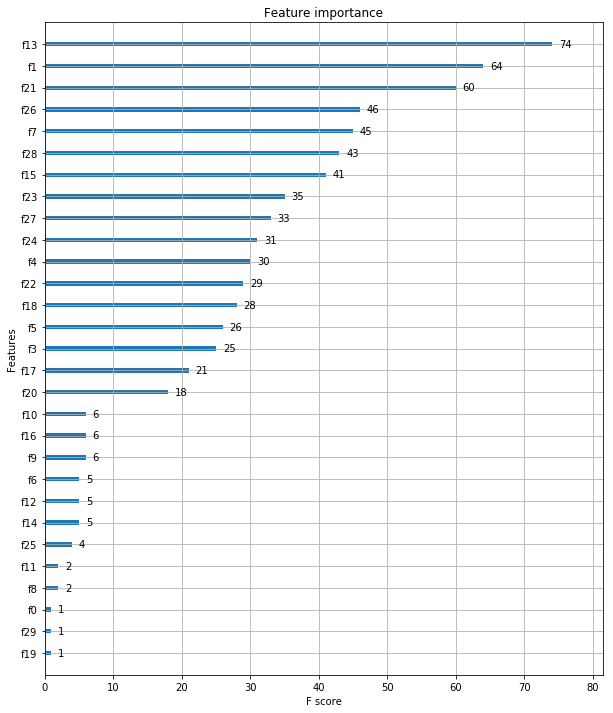

In [31]:
fig,ax = plt.subplots(figsize = (10,12))
plot_importance(xgb_wrapper, ax = ax)